In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
train = pd.read_csv("train_all.csv")

In [14]:
drop_cols = ["user_id", "supplier_id", "order_line_item_id", "order_parent_id",
             "product_content_id", "product_variant_id", "coupon_id", "promotion_name",
            'is_wallet_trx', 'is_saved_card_trx', 'brand_id', 'brand_name', 'category_id', 'category_name',
            "review_rates_min", "review_rates_max"]

train = train.drop(drop_cols, axis=1)

In [15]:
train.shape

(10702717, 15)

In [16]:
train.head()

,order_date,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean
0,2021-05-01 00:00:01.761000+00:00,0,79.90,51.94,8.88,0.0,35.0,0.0,0.098178,16357,76,25,0.328947,0.003045,3.25000
1,2021-05-01 00:00:01.761000+00:00,0,59.99,49.99,10.67,0.0,NaN,0.0,0.093355,902,9,7,0.777778,0.000744,0.00000
2,2021-05-01 00:00:01.761000+00:00,0,49.90,49.90,10.67,0.0,NaN,0.0,0.108296,227,15,3,0.200000,0.000633,0.00000
3,2021-05-01 00:00:01.761000+00:00,0,129.95,59.97,9.40,0.0,40.0,0.0,0.050737,46699,0,0,0.000000,0.000545,4.47619
4,2021-05-01 00:00:02.742000+00:00,1,89.99,71.99,9.40,0.0,20.0,0.0,0.127110,3269293,0,0,0.000000,0.002828,4.50000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702717 entries, 0 to 10702716
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_date                  object 
 1   is_elite_user               int64  
 2   original_price              float64
 3   discounted_price            float64
 4   ship_cost                   float64
 5   coupon_discount             float64
 6   promotion_award_value       float64
 7   is_returned                 float64
 8   returnRate                  float64
 9   total_claim                 int64  
 10  unresolved_claim            int64  
 11  unresolved_accepted_claim   int64  
 12  unresolvedclaim_percentage  float64
 13  defective_returnRate        float64
 14  review_rates_mean           float64
dtypes: float64(10), int64(4), object(1)
memory usage: 1.2+ GB


In [18]:
df = train.sample(frac=0.01, random_state=42)
df.shape

(107027, 15)

In [19]:
df.is_returned.value_counts()

0.0    93533
1.0    13494
Name: is_returned, dtype: int64

<AxesSubplot:xlabel='is_returned', ylabel='count'>

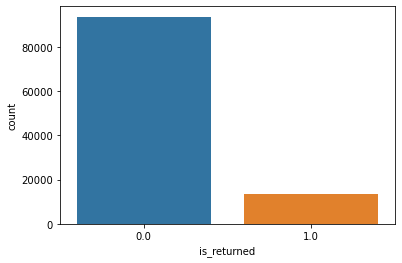

In [20]:
sns.countplot(data=df, x="is_returned")

<AxesSubplot:>

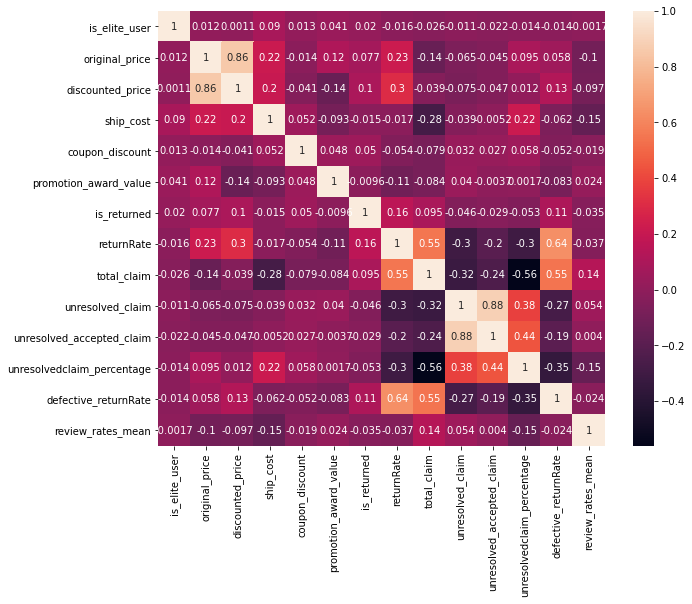

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

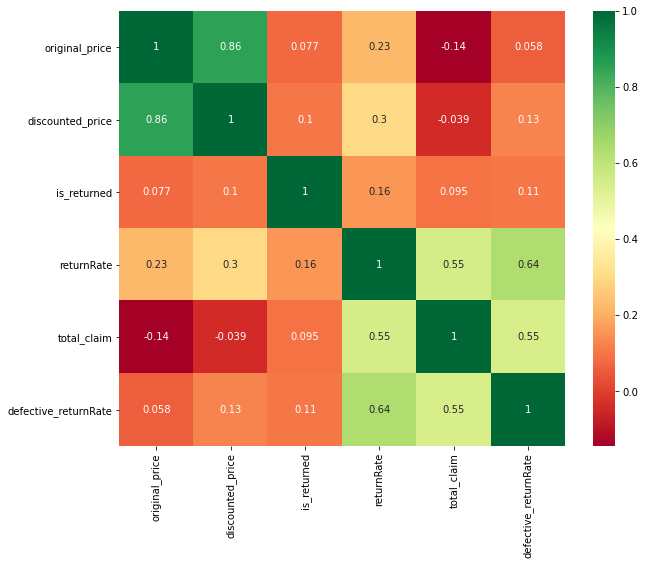

In [29]:
plt.figure(figsize=(10,8))
corrmat = df.corr()
top_features = corrmat.index[abs(corrmat["is_returned"])>0.07]
sns.heatmap(df[top_features].corr(), annot=True, cmap="RdYlGn")

#sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='original_price', ylabel='discounted_price'>

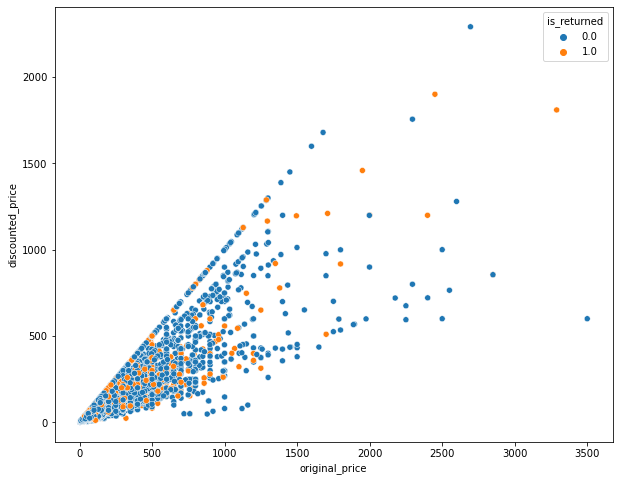

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="original_price", y="discounted_price", hue="is_returned")